In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Complete.csv")
df.Date=pd.to_datetime(df.Date)
print(df.dtypes)
df.head()

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Ticker            object
dtype: object


,Date,Open,High,Low,Close,Volume,Ticker
0,1999-03-10,45.722,45.750,44.967,45.665,11700414,qqq
1,1999-03-11,45.994,46.260,44.988,45.880,21670048,qqq
2,1999-03-12,45.721,45.749,44.406,44.770,19553768,qqq
3,1999-03-15,45.101,46.103,44.625,46.052,14245348,qqq
4,1999-03-16,46.253,46.643,45.749,46.447,10971066,qqq


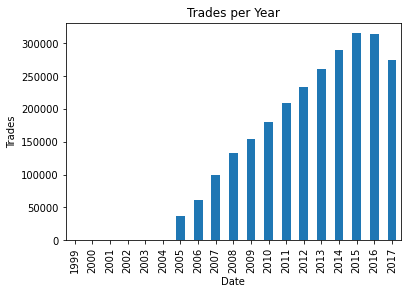

In [3]:
plt.title("Trades per Year")
plt.ylabel("Trades")
df["Ticker"].groupby(df["Date"].dt.year).count().plot(kind="bar")

In [4]:
# declaring the time range of the data
begin=2007
end=2017
firstYearDf=df[["Ticker","Date"]].loc[df.Date.dt.year==begin]
lastYearDf=df[["Ticker","Date"]].loc[df.Date.dt.year==end]

In [5]:
# filtering down to tickers that existed before 'begin' and are still there when it is 'end'
fYStock=firstYearDf.Ticker.unique().tolist()
lYStock=lastYearDf.Ticker.unique().tolist()
tickers=[i for i in fYStock if i in lYStock]
print(len(tickers))
print(tickers)

482
['iyz', 'ijt', 'xlk', 'fmy', 'xle', 'def', 'jkl', 'ige', 'fvl', 'xsd', 'mfd', 'fpx', 'xop', 'mdyg', 'vox', 'ixp', 'ewa', 'iwn', 'xli', 'vdc', 'mxi', 'ixg', 'qld', 'pwv', 'ixn', 'dhs', 'fdm', 'fxc', 'ewk', 'iyf', 'itb', 'oef', 'mdy', 'fez', 'pxq', 'pzd', 'doo', 'jkh', 'fxb', 'spyg', 'eem', 'pzi', 'jkg', 'dbc', 'sso', 'rye', 'ewc', 'rpg', 'pbe', 'ijk', 'xes', 'tlt', 'dfj', 'iye', 'vaw', 'ryt', 'vbk', 'vgt', 'dnl', 'gdx', 'ffa', 'ryj', 'kxi', 'kie', 'dth', 'xlb', 'iyw', 'ive', 'xlu', 'rfg', 'slyg', 'vwo', 'pbs', 'psp', 'dbv', 'ihf', 'vgk', 'vpu', 'pph', 'voe', 'iyc', 'qqew', 'dia', 'rgi', 'ewd', 'don', 'myy', 'xph', 'fxs', 'iwv', 'iyk', 'oneq', 'xlv', 'iwc', 'rtm', 'icf', 'jkj', 'ief', 'fxf', 'sphq', 'spy', 'dln', 'iyr', 'rpv', 'iez', 'vig', 'fxa', 'dxj', 'ivw', 'jkk', 'rzv', 'jkf', 'fct', 'pwc', 'dvy', 'ewi', 'efv', 'ewu', 'smh', 'vde', 'slyv', 'slv', 'iyh', 'mzz', 'xlp', 'pmr', 'ewg', 'gld', 'fxi', 'qtec', 'ixj', 'iai', 'iwr', 'efg', 'pjp', 'pey', 'spyv', 'ewj', 'feo', 'cvy', 'dwm',

In [12]:
dfF1=df.loc[(df.Ticker.isin(tickers)) & (df.Date.dt.year>=begin)]
dfF1

,Date,Open,High,Low,Close,Volume,Ticker
100442,2007-01-03,24.949,25.1640,24.730,24.891,758760,iyz
100443,2007-01-03,60.022,60.3510,59.039,59.684,427897,ijt
100444,2007-01-03,20.768,21.0340,20.537,20.741,5337498,xlk
100445,2007-01-03,9.884,9.9110,9.884,9.904,2478,fmy
100446,2007-01-03,50.010,50.0780,48.165,48.524,55343610,xle
...,...,...,...,...,...,...,...
2565565,2017-11-10,6.090,6.1200,6.090,6.110,28369,rja
2565568,2017-11-10,148.820,148.8540,148.402,148.648,3256,rfg
2565569,2017-11-10,265.250,265.7100,264.700,265.600,18926,oneq
2565575,2017-11-10,127.450,127.8200,127.295,127.450,256090,vbr


In [13]:
date=dfF1.Date.loc[dfF1.Ticker=='qqq'].tolist()
dfF1.set_index("Date")

,Open,High,Low,Close,Volume,Ticker
Date,,,,,,
2007-01-03,24.949,25.1640,24.730,24.891,758760,iyz
2007-01-03,60.022,60.3510,59.039,59.684,427897,ijt
2007-01-03,20.768,21.0340,20.537,20.741,5337498,xlk
2007-01-03,9.884,9.9110,9.884,9.904,2478,fmy
2007-01-03,50.010,50.0780,48.165,48.524,55343610,xle
...,...,...,...,...,...,...
2017-11-10,6.090,6.1200,6.090,6.110,28369,rja
2017-11-10,148.820,148.8540,148.402,148.648,3256,rfg
2017-11-10,265.250,265.7100,264.700,265.600,18926,oneq


In [19]:
dfF1.groupby(['Date',"Ticker"]).head()

,Date,Open,High,Low,Close,Volume,Ticker
100442,2007-01-03,24.949,25.1640,24.730,24.891,758760,iyz
100443,2007-01-03,60.022,60.3510,59.039,59.684,427897,ijt
100444,2007-01-03,20.768,21.0340,20.537,20.741,5337498,xlk
100445,2007-01-03,9.884,9.9110,9.884,9.904,2478,fmy
100446,2007-01-03,50.010,50.0780,48.165,48.524,55343610,xle
...,...,...,...,...,...,...,...
2565565,2017-11-10,6.090,6.1200,6.090,6.110,28369,rja
2565568,2017-11-10,148.820,148.8540,148.402,148.648,3256,rfg
2565569,2017-11-10,265.250,265.7100,264.700,265.600,18926,oneq
2565575,2017-11-10,127.450,127.8200,127.295,127.450,256090,vbr


In [60]:
tickUse=list()

for t in tickers:
    tickUse.append(df2.Ticker.loc[(df2.Date.isin(date)) & (df2.Ticker==t)])

In [63]:
tickUse

[100442     iyz
 101027     iyz
 101335     iyz
 101656     iyz
 101707     iyz
           ... 
 2559527    iyz
 2561279    iyz
 2561960    iyz
 2563574    iyz
 2564712    iyz
 Name: Ticker, Length: 2735, dtype: object,
 100443     ijt
 100786     ijt
 101347     ijt
 101418     ijt
 101751     ijt
           ... 
 2560454    ijt
 2561353    ijt
 2562170    ijt
 2564265    ijt
 2565166    ijt
 Name: Ticker, Length: 2735, dtype: object,
 100444     xlk
 101022     xlk
 101278     xlk
 101383     xlk
 101810     xlk
           ... 
 2559625    xlk
 2561520    xlk
 2562225    xlk
 2563923    xlk
 2564889    xlk
 Name: Ticker, Length: 2735, dtype: object,
 100445     fmy
 101032     fmy
 101230     fmy
 101498     fmy
 101796     fmy
           ... 
 2559248    fmy
 2561574    fmy
 2562916    fmy
 2564221    fmy
 2564611    fmy
 Name: Ticker, Length: 2728, dtype: object,
 100446     xle
 100831     xle
 101211     xle
 101440     xle
 101830     xle
           ... 
 2560227    xle
 2561592

In [66]:
c=list()
for i in tickUse:
    c.append(np.array2string(i.unique())[2:-2])
c

['iyz',
 'ijt',
 'xlk',
 'fmy',
 'xle',
 'def',
 'jkl',
 'ige',
 'fvl',
 'xsd',
 'mfd',
 'fpx',
 'xop',
 'mdyg',
 'vox',
 'ixp',
 'ewa',
 'iwn',
 'xli',
 'vdc',
 'mxi',
 'ixg',
 'qld',
 'pwv',
 'ixn',
 'dhs',
 'fdm',
 'fxc',
 'ewk',
 'iyf',
 'itb',
 'oef',
 'mdy',
 'fez',
 'pxq',
 'pzd',
 'doo',
 'jkh',
 'fxb',
 'spyg',
 'eem',
 'pzi',
 'jkg',
 'dbc',
 'sso',
 'rye',
 'ewc',
 'rpg',
 'pbe',
 'ijk',
 'xes',
 'tlt',
 'dfj',
 'iye',
 'vaw',
 'ryt',
 'vbk',
 'vgt',
 'dnl',
 'gdx',
 'ffa',
 'ryj',
 'kxi',
 'kie',
 'dth',
 'xlb',
 'iyw',
 'ive',
 'xlu',
 'rfg',
 'slyg',
 'vwo',
 'pbs',
 'psp',
 'dbv',
 'ihf',
 'vgk',
 'vpu',
 'pph',
 'voe',
 'iyc',
 'qqew',
 'dia',
 'rgi',
 'ewd',
 'don',
 'myy',
 'xph',
 'fxs',
 'iwv',
 'iyk',
 'oneq',
 'xlv',
 'iwc',
 'rtm',
 'icf',
 'jkj',
 'ief',
 'fxf',
 'sphq',
 'spy',
 'dln',
 'iyr',
 'rpv',
 'iez',
 'vig',
 'fxa',
 'dxj',
 'ivw',
 'jkk',
 'rzv',
 'jkf',
 'fct',
 'pwc',
 'dvy',
 'ewi',
 'efv',
 'ewu',
 'smh',
 'vde',
 'slyv',
 'slv',
 'iyh',
 'mzz',
 

In [10]:
u=list()
for t in c:
    u.append(df)

[[2735, 'iyz'], [2735, 'ijt'], [2735, 'xlk'], [2728, 'fmy'], [2735, 'xle'], [2714, 'def'], [2735, 'jkl'], [2735, 'ige'], [2731, 'fvl'], [2733, 'xsd'], [2735, 'mfd'], [2704, 'fpx'], [2735, 'xop'], [2723, 'mdyg'], [2735, 'vox'], [2735, 'ixp'], [2735, 'ewa'], [2735, 'iwn'], [2735, 'xli'], [2735, 'vdc'], [2735, 'mxi'], [2735, 'ixg'], [2735, 'qld'], [2735, 'pwv'], [2735, 'ixn'], [2735, 'dhs'], [2725, 'fdm'], [2735, 'fxc'], [2735, 'ewk'], [2735, 'iyf'], [2735, 'itb'], [2735, 'oef'], [2735, 'mdy'], [2735, 'fez'], [2682, 'pxq'], [2735, 'pzd'], [2735, 'doo'], [2729, 'jkh'], [2735, 'fxb'], [2736, 'spyg'], [2735, 'eem'], [2707, 'pzi'], [2735, 'jkg'], [2735, 'dbc'], [2735, 'sso'], [2693, 'rye'], [2735, 'ewc'], [2730, 'rpg'], [2735, 'pbe'], [2735, 'ijk'], [2735, 'xes'], [2735, 'tlt'], [2735, 'dfj'], [2735, 'iye'], [2735, 'vaw'], [2683, 'ryt'], [2735, 'vbk'], [2735, 'vgt'], [2716, 'dnl'], [2735, 'gdx'], [2735, 'ffa'], [2735, 'ryj'], [2735, 'kxi'], [2735, 'kie'], [2735, 'dth'], [2735, 'xlb'], [2735, 

In [11]:
dates=np.array(tlDate.Date.loc[tlDate.Ticker=='pwc'].unique(),dtype="datetime64[D]")
dates=np.sort(dates,axis=0)
print(dates)

['2007-01-03' '2007-01-04' '2007-01-05' ... '2017-11-08' '2017-11-09'
 '2017-11-10']


In [14]:
data=df.loc[(df.Date.isin(dates))&(df.Ticker.isin(tickers))]

In [15]:
print(len(data.loc[data.Ticker=='qqq']))
print(len(dates))

2725
2725


In [16]:
print(len(data.Ticker.unique()))

482


In [17]:
data.to_csv(r'CleanData.csv',index=False)